# Blockly Trial Map Generator

In this notebook, we will generate trial maps for the experiment

In [16]:
import numpy as np
import sys
sys.path.append("../src/") # go to source dir


In [17]:
from level import showLevelWithAgentPNG, showLevelPNGMark
from trial import Trial


In [18]:
trial = Trial(map_size = 8, num_agents = 4)
trial

Trial(id=1, map_size=8, num_agents=4)

In [19]:
trial.grid.maze.grid

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

start location Tile(row=9, col=9, value=0, size=0, direction='SOUTH', code_block='empty')
end location Tile(row=9, col=8, value=0, size=0, direction='None', code_block='empty')
start solving maze...


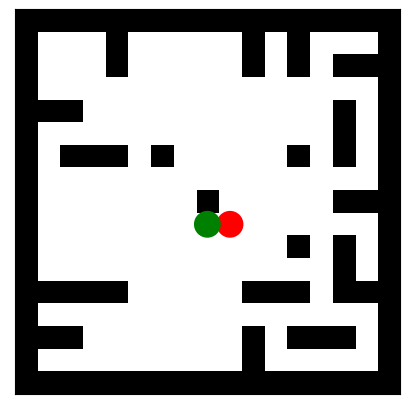

maze is solved!


ValueError: (0, 0) is not a valid DirectionEnum

In [20]:
trial.start_agent_walk(False, False)

In [ ]:
trial.grid.maze

#################
#   #     # #   #
#   #     # # ###
#               #
###           # #
#             # #
# ### #     # # #
#               #
#       #     ###
#       E+++++  #
#           #+# #
#            +# #
#####     ###+###
#            +++S
###       # ### #
#         #     #
#################

In [ ]:
trial.agents[0].path[0]

In [ ]:
showLevelWithAgentPNG(trial.grid.maze.grid, trial.agents[0].path)

In [ ]:
from mazelib.generate.DungeonRooms import DungeonRooms
from mazelib import Maze
from mazelib.generate.AldousBroder import AldousBroder
from mazelib.generate.BinaryTree import BinaryTree
from mazelib.generate.CellularAutomaton import CellularAutomaton
from mazelib.solve.ShortestPaths import ShortestPaths
from mazelib.solve.Tremaux import Tremaux
from mazelib.solve.BacktrackingSolver import BacktrackingSolver
from mazelib.solve.Collision import Collision
from mazelib.solve.Chain import Chain

m = Maze()
m.generator = CellularAutomaton(8, 8, 0.1, 0.2)
m.generate()

In [ ]:
import random
import numpy as np
def gen_rand_location(locations, r_min, r_max, c_min, c_max):
        end_r, end_c = random.choice([(r, c) for r, c in zip(locations[0], locations[1]) if (
            r >= r_min) and (r <= r_max) and (c >= c_min) and (c <= c_max)])
        return (end_r, end_c)

grid = m.grid
r, c = grid.shape
locations = np.where(grid == 0)
# list(zip(locations[0], locations[1]))
r // 2 - 2, r // 2 + 2, c // 2 - 1, c // 2 + 1


In [ ]:

start_r, start_c = gen_rand_location(
    locations, r // 2 - 1, r // 2 + 1, c // 2 - 1, c // 2 + 1)
start_tile = (int(start_r), int(start_c))
direction = 'north'

if direction == 'south':
    end_r, end_c = gen_rand_location(locations, r // 2, r, 0, c)
elif direction == 'north':
    end_r, end_c = gen_rand_location(locations, 0, r // 2, 0, c)
elif direction == 'east':
    end_r, end_c = gen_rand_location(locations, 0, r, c // 2, c)
elif direction == 'west':
    end_r, end_c = gen_rand_location(locations, 0, r, 0, c // 2)

end_tile = (end_r, end_c)
start_tile, end_tile

In [ ]:
m.end = end_tile

In [ ]:
m.generate_entrances()
# m.start = start_tile

In [ ]:
showLevelPNGMark(m.grid, m.start, m.end)

In [ ]:

m.solver = Chain()

In [ ]:
m.solve()

In [ ]:
m.solutions